### Basic method
1. Calculate the k-NN local number density in units of image element (i.e. pixel length^3) for every particle
2. For every particle below the density threshold (3 particles per element by default), calculate the k-NN distance, $d$
3. Split each of these particles into $N$ sub-particles with a 3D Gaussian distribution w/ mean equal to the original particle and $\sigma=d$
4. Bin into pixels

Here we demonstrate smoothing a cloud of particles that have Gaussian distribution.
We show a smoothed sum image and smoothed mean image.

In [1]:
import smooth_3d as s3d
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# creating distribution of points
X = np.random.normal(0,20,size=(3, 100000))
flux = np.random.uniform(10,50,size=(1,100000))
Z = np.zeros_like(flux)
Z[:,X[1,:] > 0] = -1; Z[:,X[1,:] < 0] = 1; Z[:,(X[1,:] < 0) & (X[2,:] > 0)] = 0 

In [3]:
# binning without smoothing
imgs0 = s3d.bin_particles(X, flux, projection='yz', extent=120, res=0.5)
imgs0_Z = s3d.bin_particles(X, Z, projection='yz', extent=120, res=0.5, statistic='mean')
# binning with smoothing
imgs, imgs_Z = s3d.smooth_3d(X, flux, Z, projection='yz', njobs=4, nsteps=250, k=5,
                         n_resample=500, extent=120, res=0.5, upper_threshold=False)

      calculating local density of each particle...
      smoothing particle distribution...


100%|██████████| 250/250 [00:01<00:00, 203.12it/s]
/home/garreth/Dropbox/Code/smooth3d/smooth_3d.py:308: RuntimeWarning: invalid value encountered in true_divide
  average_img.append(gaussian_filter(h_ld / h3[i], sigma))


/home/garreth/anaconda2/envs/python3env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/garreth/anaconda2/envs/python3env/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


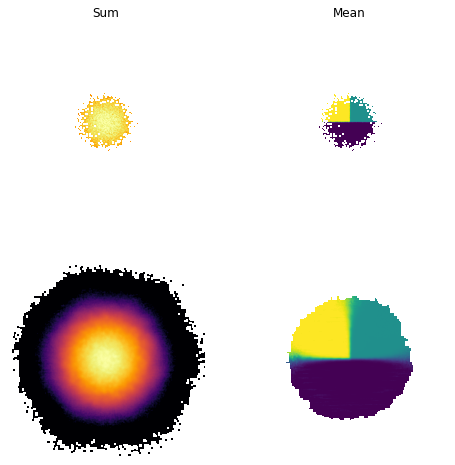

In [5]:
# plotting result
fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].imshow(np.log10(imgs0[0]), vmin=-1, vmax=2.5, cmap='inferno')
axs[0,0].axis('off');
axs[0,0].set_title('Sum')
axs[0,1].imshow((imgs0_Z[0]), vmin=-1, vmax=1, cmap='viridis')
axs[0,1].axis('off');
axs[0,1].set_title('Mean')
axs[1,0].imshow(np.log10(imgs[0]), vmin=-1, vmax=2.5, cmap='inferno')
axs[1,0].axis('off');
axs[1,1].imshow((imgs_Z[0]), vmin=-1, vmax=1, cmap='viridis')
axs[1,1].axis('off');

plt.savefig('example.png', bbox_inches='tight')